In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 2858 files belonging to 34 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['ajo',
 'anana',
 'arveja',
 'banana',
 'batata',
 'berenjena',
 'cebolla',
 'choclo',
 'coliflor',
 'espinaca',
 'granada',
 'jalapeno',
 'jengibre',
 'kiwi',
 'lechuga',
 'limon',
 'mango',
 'manzana',
 'melon',
 'morron',
 'nabo',
 'naranja',
 'papa',
 'paprika',
 'pepino',
 'pera',
 'rabano',
 'remolacha',
 'repollo',
 'sandia',
 'soja',
 'tomate',
 'uva',
 'zanahoria']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 332 files belonging to 34 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 358 files belonging to 35 classes.


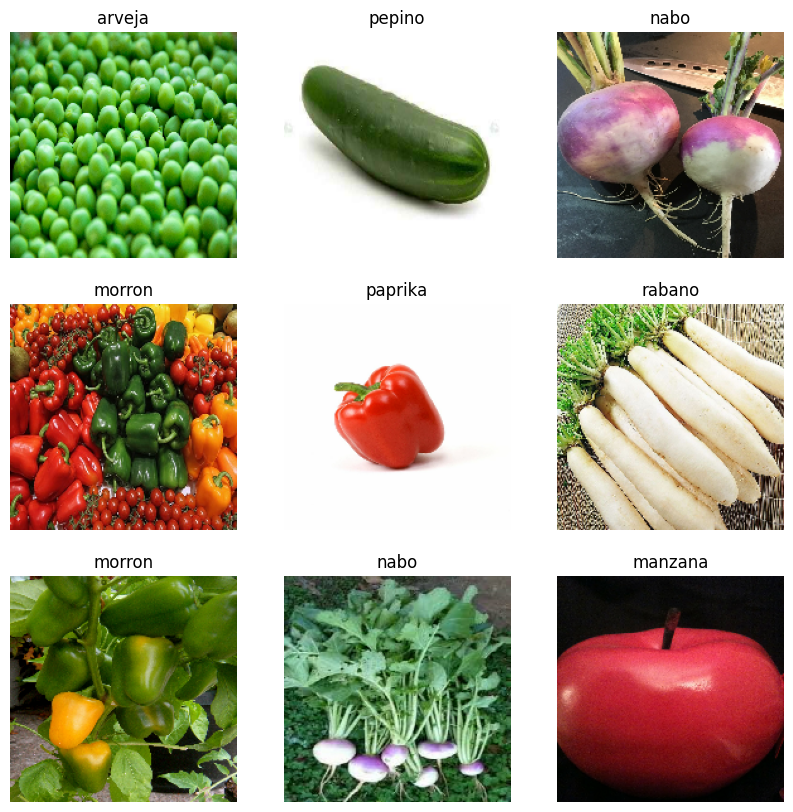

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(512),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 15
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 326ms/step - accuracy: 0.0627 - loss: 4.7166 - val_accuracy: 0.3494 - val_loss: 2.3698
Epoch 2/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 304ms/step - accuracy: 0.2520 - loss: 2.5109 - val_accuracy: 0.6145 - val_loss: 1.4940
Epoch 3/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 314ms/step - accuracy: 0.4811 - loss: 1.7978 - val_accuracy: 0.7560 - val_loss: 0.8281
Epoch 4/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 352ms/step - accuracy: 0.7000 - loss: 1.0627 - val_accuracy: 0.8855 - val_loss: 0.5401
Epoch 5/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 331ms/step - accuracy: 0.8241 - loss: 0.6232 - val_accuracy: 0.9187 - val_loss: 0.3834
Epoch 6/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 305ms/step - accuracy: 0.8928 - loss: 0.3994 - val_accuracy: 0.9488 - val_loss: 0.3303
Epoch 7/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 302ms/step - accuracy: 0.9381 - loss: 0.2218 - val_accuracy: 0.9578 - val_loss: 0.3029
Epoch 8/15
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 304ms/step - accuracy: 0.9591 - loss: 0.1573 - val_accu

Text(0.5, 1.0, 'Loss')

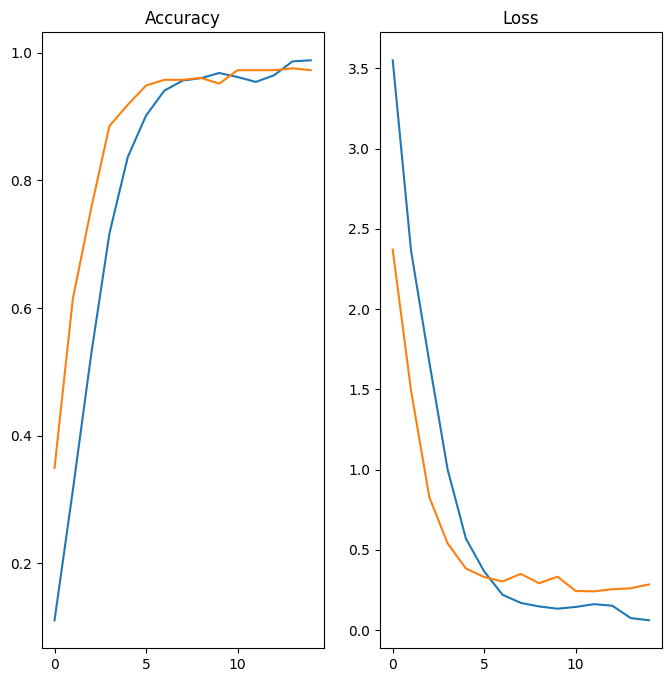

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [37]:
image = 'naranja.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [38]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [39]:
score = tf.nn.softmax(predict)

In [40]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is naranja with accuracy of 100.00


In [41]:
model.save('Modelo.keras')